Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4762 - accuracy: 0.8306
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3575 - accuracy: 0.8696
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8664


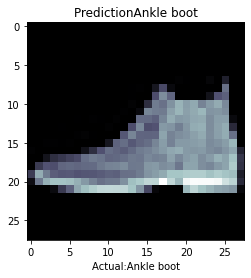

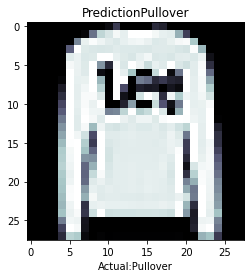

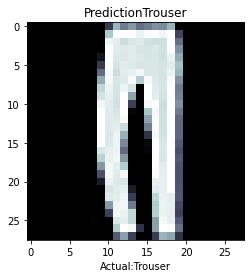

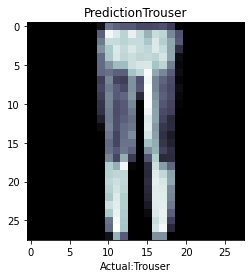

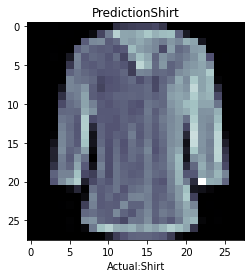

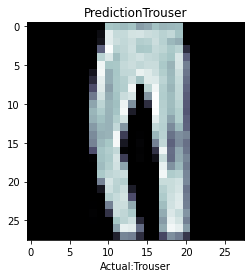

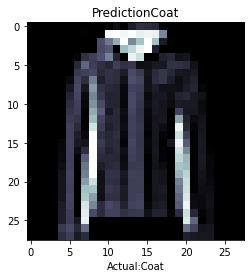

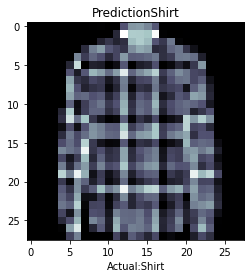

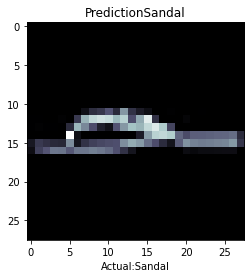

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/My Drive/fashion-mnist_train.csv'

data = tf.keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images , test_labels) = data.load_data()


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images/255.0
test_images = test_images/255.0               

model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(528 , activation="relu"),
                          keras.layers.Dense(10, activation="sigmoid")

])
model.compile(optimizer="Adam" , loss="sparse_categorical_crossentropy"  , metrics = ["accuracy"])

model.fit(train_images, train_labels, epochs=3)

test_loss , test_acc = model.evaluate(test_images, test_labels)

prediction = model.predict(test_images)

for i in range(9):
  plt.grid(False)
  plt.imshow(test_images[i], cmap="bone")
  plt.xlabel("Actual:" + class_names[test_labels[i]])
  plt.title("Prediction" + class_names[np.argmax(prediction[i])])
  plt.show()

